CPU Info: 14 cores (physical), 20 cores (logical)
Memory Info: svmem(total=16782430208, available=8453177344, percent=49.6, used=8329252864, free=8453177344)


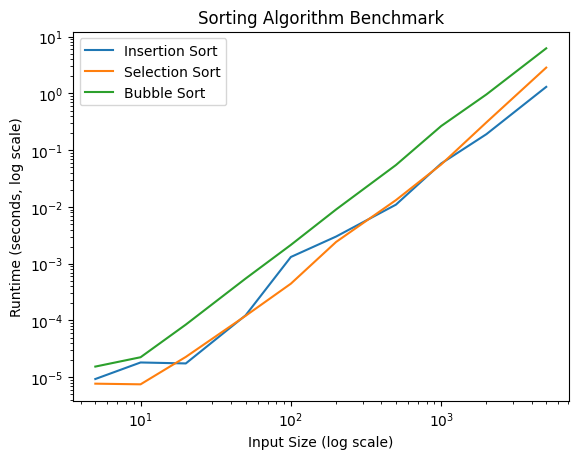

In [1]:
import timeit
import matplotlib.pyplot as plt
import numpy as np
import psutil

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def selection_sort(arr):
    for i in range(len(arr)):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

def benchmark_algorithm(algorithm, input_sizes):
    runtimes = []
    for size in input_sizes:
        arr = np.random.rand(size)
        start_time = timeit.default_timer()
        algorithm(arr)
        end_time = timeit.default_timer()
        runtime = end_time - start_time
        runtimes.append(runtime)
    return runtimes

# Gather system information using psutil
cpu_info = f"CPU Info: {psutil.cpu_count(logical=False)} cores (physical), {psutil.cpu_count(logical=True)} cores (logical)"
memory_info = f"Memory Info: {psutil.virtual_memory()}"

print(cpu_info)
print(memory_info)

# Input sizes ranging from small to large
input_sizes = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]

# Run benchmarks for each algorithm
insertion_sort_runtimes = benchmark_algorithm(insertion_sort, input_sizes)
selection_sort_runtimes = benchmark_algorithm(selection_sort, input_sizes)
bubble_sort_runtimes = benchmark_algorithm(bubble_sort, input_sizes)

# Plot the results
plt.plot(input_sizes, insertion_sort_runtimes, label='Insertion Sort')
plt.plot(input_sizes, selection_sort_runtimes, label='Selection Sort')
plt.plot(input_sizes, bubble_sort_runtimes, label='Bubble Sort')
plt.xscale('log')  # Logarithmic scale for better visualization
plt.yscale('log')
plt.xlabel('Input Size (log scale)')
plt.ylabel('Runtime (seconds, log scale)')
plt.title('Sorting Algorithm Benchmark')
plt.legend()
plt.show()